In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)
from zipfile import ZipFile

In [7]:
os.listdir('../data/house_market')

['data_dictionary.txt', 'sample_submission.csv', 'test_h.csv', 'train_h.csv']

In [8]:
train_df = pd.read_csv(ZipFile("../data/house_market/train.csv.zip").open('train.csv'), parse_dates=['timestamp'])
test_df = pd.read_csv(ZipFile("../data/house_market/test.csv.zip").open('test.csv'), parse_dates=['timestamp'])
macro_df = pd.read_csv(ZipFile("../data/house_market/macro.csv.zip").open('macro.csv'), parse_dates=['timestamp'])

In [9]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [10]:
macro_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

In [11]:
train_df = pd.merge(train_df, macro_df, how="left", on="timestamp")
test_df = pd.merge(test_df, macro_df, how="left", on="timestamp")

In [12]:
train_df.shape, test_df.shape

((30471, 391), (7662, 390))

In [13]:
train_df['price_doc'].dtype

dtype('int64')

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(range(train_df.shape(0), np.sort(train_df.price_doc.values)))
plt.xlabel('index', frontsize = 12)
plt.ylabel('price', frontsize = 12)
plt.show()

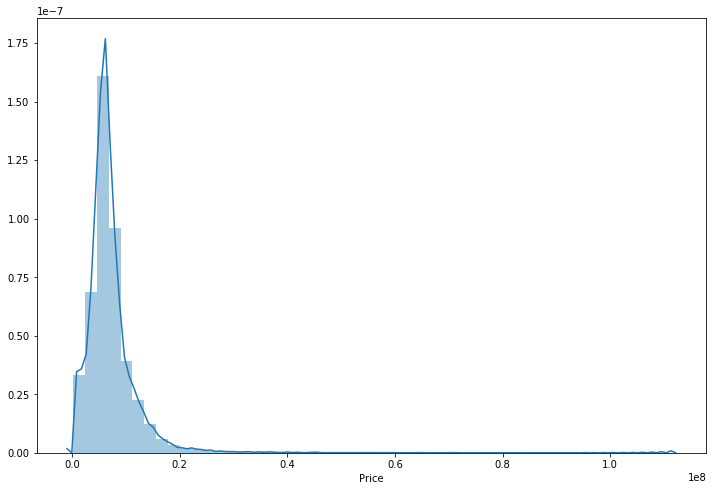

In [15]:
plt.figure(figsize = (12,8))
sns.distplot(train_df.price_doc.values, bins = 50, kde = True)
plt.xlabel('Price')
plt.show()

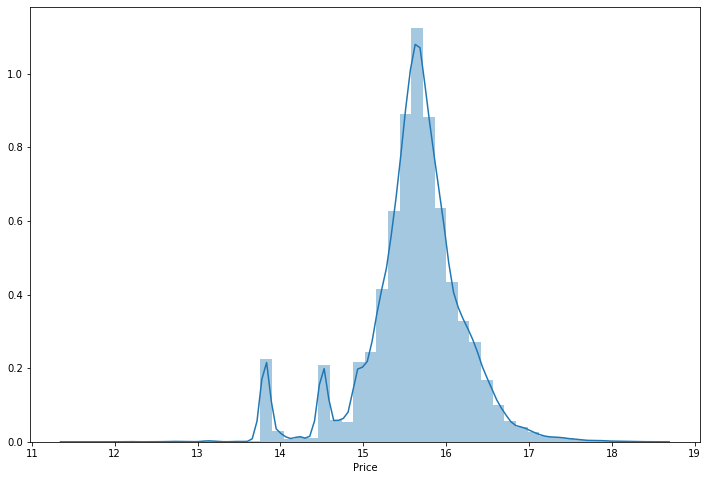

In [16]:
plt.figure(figsize = (12,8))
sns.distplot(np.log(train_df.price_doc.values), bins = 50, kde = True)
plt.xlabel('Price')
plt.show()

In [18]:
upper_limit = np.percentile(train_df['price_doc'],99)
lower_limit = np.percentile(train_df['price_doc'],1)

train_df.loc[(train_df['price_doc'] > upper_limit), 'price_doc'] = upper_limit
train_df.loc[(train_df['price_doc'] < lower_limit), 'price_doc'] = lower_limit

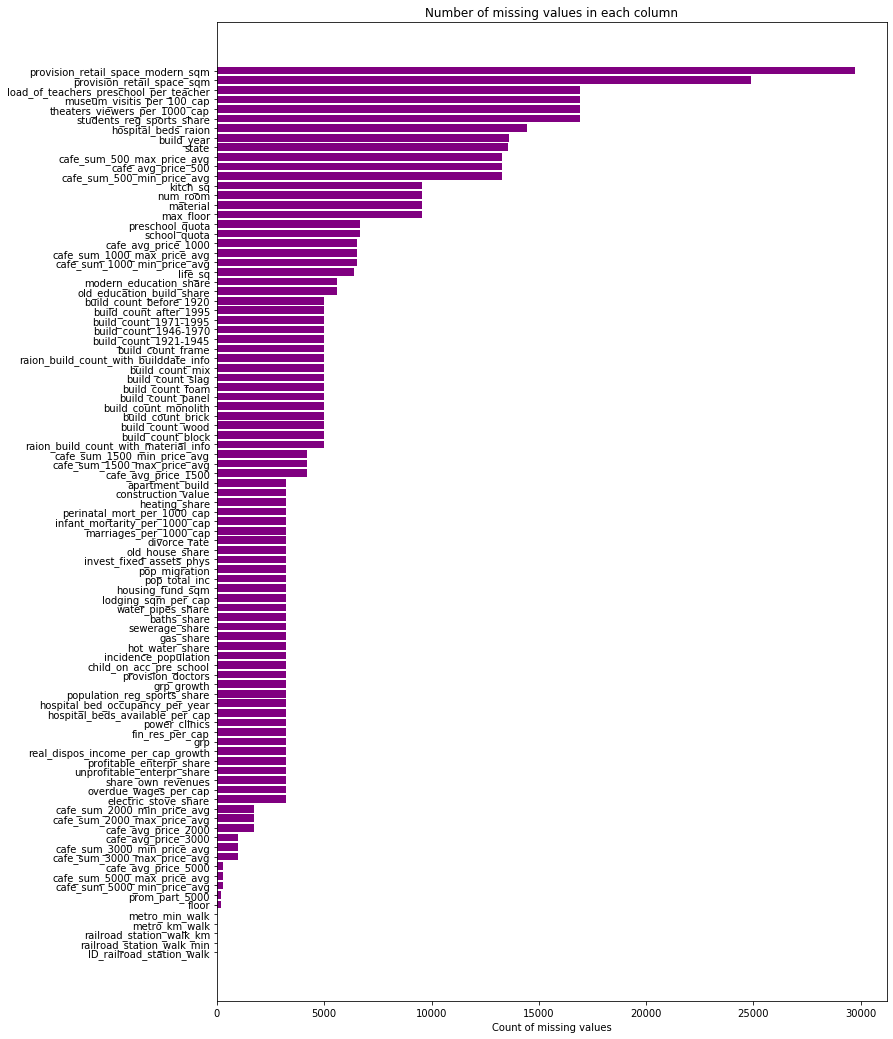

In [25]:
missing_df = train_df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] >0),:]
missing_df = missing_df.sort_values(by = 'missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize = (12,18))
rects = ax.barh(ind, missing_df['missing_count'], color = 'purple')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation = 'horizontal')
ax.set_xlabel('Count of missing values')
ax.set_title('Number of missing values in each column')
plt.show()

In [26]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype =='object']

le = preprocessing.LabelEncoder()

for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col].astype('str'))
    test_df[col] = le.fit_transform(test_df[col].astype('str'))

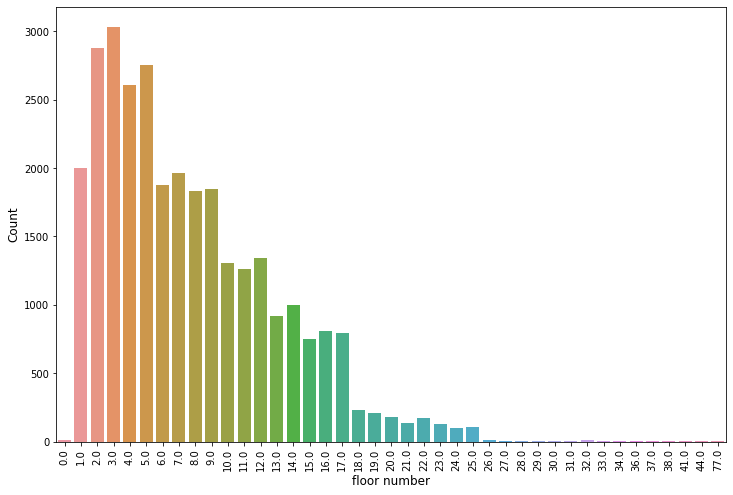

In [29]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'floor', data = train_df)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('floor number', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

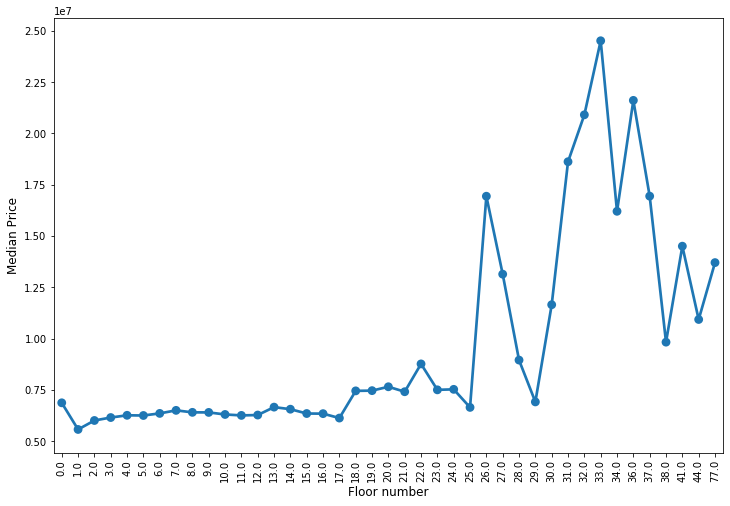

In [31]:
temp_df = train_df.groupby(['floor'])['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12, 8))
sns.pointplot (x = 'floor', y = 'price_doc', data = temp_df)
plt.ylabel('Median Price', fontsize = 12)
plt.xlabel('Floor number', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

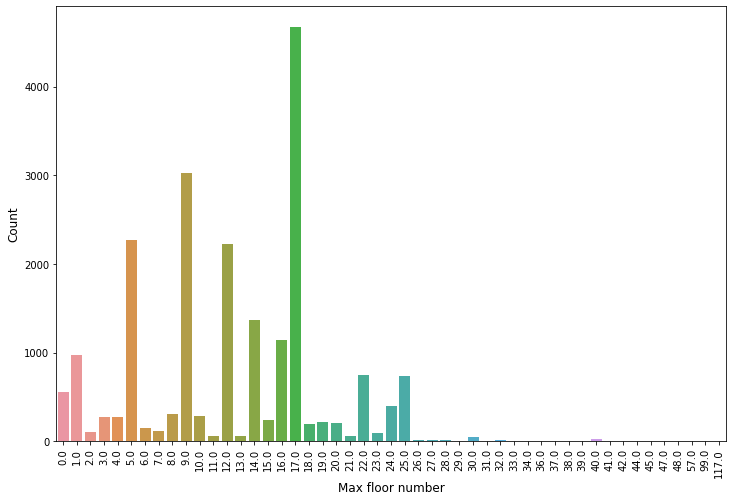

In [32]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'max_floor', data = train_df)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Max floor number', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

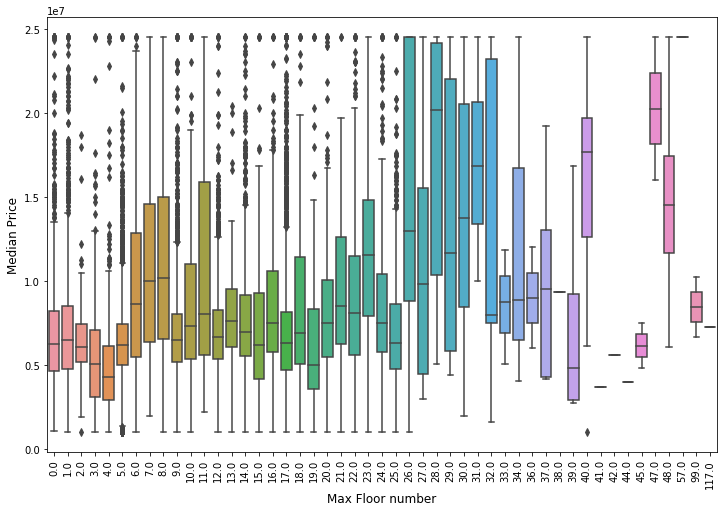

In [34]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'max_floor', y = 'price_doc', data = train_df)
plt.ylabel('Median Price', fontsize = 12)
plt.xlabel('Max Floor number', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

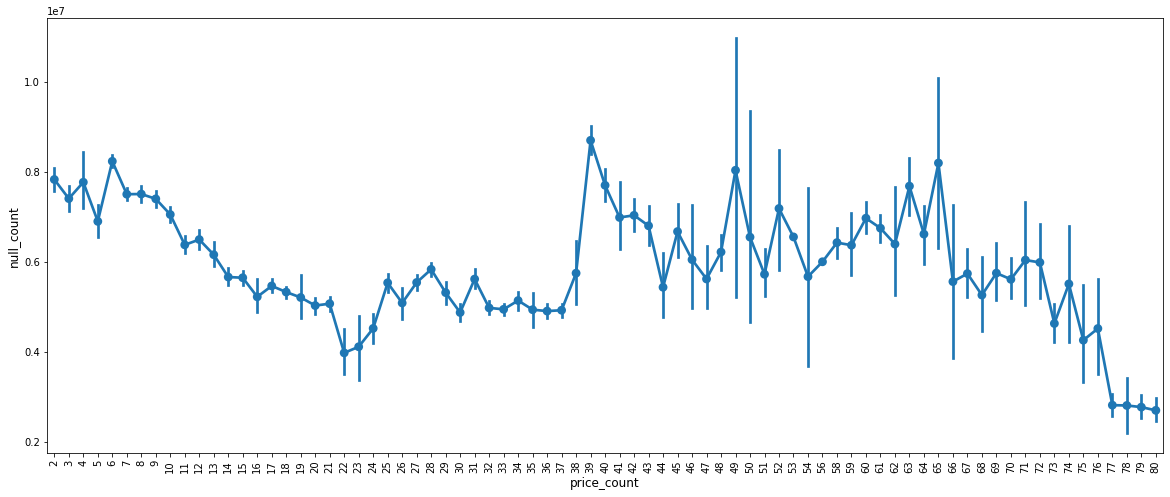

In [35]:
train_df['null_count'] = train_df.isnull().sum(axis = 1)
test_df['null_count'] = test_df.isnull().sum(axis = 1)

plt.figure(figsize = (20, 8))
sns.pointplot(x = 'null_count', y = 'price_doc', data = train_df)
plt.xlabel('price_count', fontsize = 12)
plt.ylabel('null_count', fontsize = 12)
plt.xticks(rotation= 'vertical')
plt.show()

In [36]:
train_df.fillna(-99,inplace = True)
test_df.fillna(-99, inplace = True)

In [50]:
train_df['yearmonth'] = train_df['timestamp'].dt.year*100 + train_df['timestamp'].dt.month
test_df['yearmonth'] = test_df['timestamp'].dt.year*100 + test_df['timestamp'].dt.month

train_df['yearweek'] = train_df['timestamp'].dt.year*100 + train_df['timestamp'].dt.weekofyear
test_df['yearweek'] = test_df['timestamp'].dt.year*100 + test_df['timestamp'].dt.weekofyear

train_df['year'] = train_df['timestamp'].dt.year
test_df['year'] = test_df['timestamp'].dt.year

train_df['month_of_year'] = train_df['timestamp'].dt.month
test_df['month_of_year'] = test_df['timestamp'].dt.month

train_df['week_of_year'] = train_df['timestamp'].dt.weekofyear
test_df['week_of_year'] = test_df['timestamp'].dt.weekofyear

train_df['day_of_year'] = train_df['timestamp'].dt.weekday
test_df['day_of_year'] = test_df['timestamp'].dt.weekday


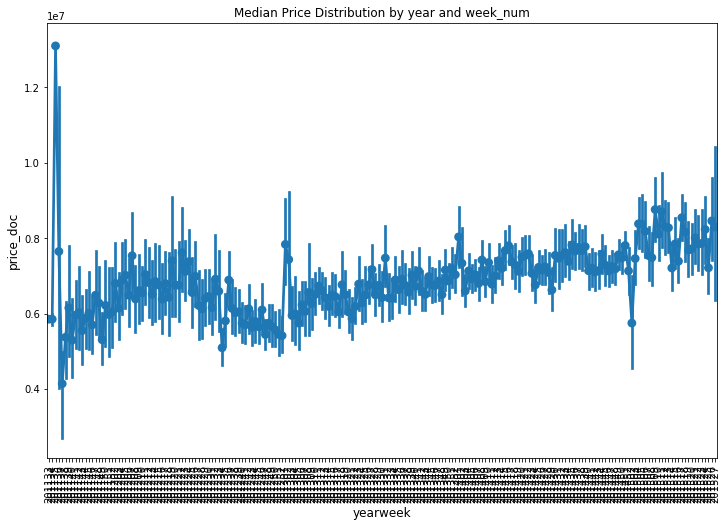

In [51]:
plt.figure(figsize = (12, 8))
sns.pointplot(x = 'yearweek', y = 'price_doc', data = train_df)
plt.ylabel('price_doc', fontsize = 12)
plt.xlabel('yearweek', fontsize = 12)
plt.title('Median Price Distribution by year and week_num')
plt.xticks(rotation = 'vertical')
plt.show()

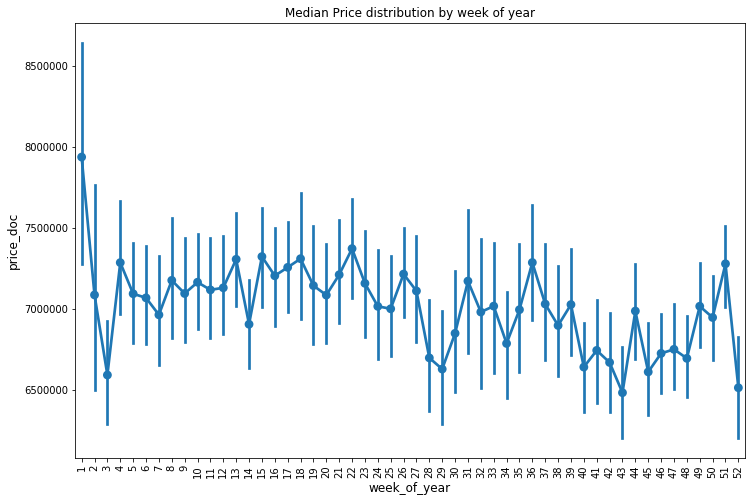

In [52]:
plt.figure(figsize=(12,8))
sns.pointplot(x='week_of_year', y='price_doc', data=train_df)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('week_of_year', fontsize=12)
plt.title('Median Price distribution by week of year')
plt.xticks(rotation='vertical')
plt.show()

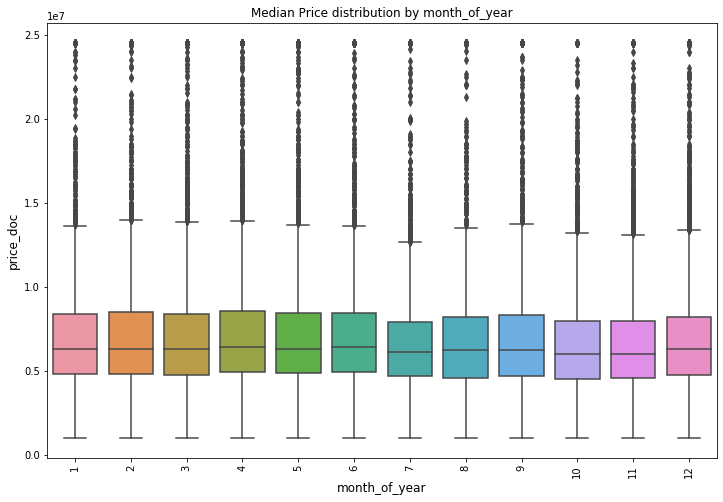

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month_of_year', y='price_doc', data=train_df)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('month_of_year', fontsize=12)
plt.title('Median Price distribution by month_of_year')
plt.xticks(rotation='vertical')
plt.show()

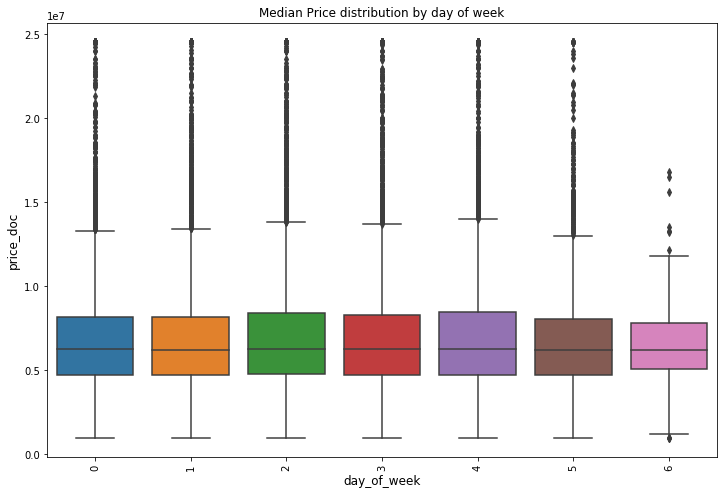

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x='day_of_week', y='price_doc', data=train_df)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('day_of_week', fontsize=12)
plt.title('Median Price distribution by day of week')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
train_df['ratio_life_sq_full_sq'] = train_df['life_sq']/np.maximum(train_df['full_sq'].astype('float'),1)
test_df['ratio_life_sq_full_sq'] = test_df['life_sq'] / np.maximum(test_df['full_sq'].astype('float'),1)

train_df.loc[(train_df['ratio_life_sq_full_sq'] < 0), 'ratio_life_sq_full_sq'] = 0
train_df.loc[(train_df['ratio_life_sq_full_sq'] > 1), 'ratio_life_sq_full_sq'] = 1

test_df.loc[(test_df['ratio_life_sq_full_sq'] < 0), 'ratio_life_sq_full_sq'] = 0
test_df.loc[(test_df['ratio_life_sq_full_sq'] > 1), 'ratio_life_sq_full_sq'] = 1



train_df['ratio_kitch_sq_full_sq'] = train_df['kitch_sq']/np.maximum(train_df['full_sq'].astype('float'),1)
test_df['ratio_kitch_sq_full_sq'] = test_df['kitch_sq'] / np.maximum(test_df['full_sq'].astype('float'),1)

train_df.loc[(train_df['ratio_kitch_sq_full_sq'] < 0), 'ratio_kitch_sq_full_sq'] = 0
train_df.loc[(train_df['ratio_kitch_sq_full_sq'] > 1), 'ratio_kitch_sq_full_sq'] = 1

test_df.loc[(test_df['ratio_kitch_sq_full_sq'] < 0), 'ratio_kitch_sq_full_sq'] = 0
test_df.loc[(test_df['ratio_kitch_sq_full_sq'] > 1), 'ratio_kitch_sq_full_sq'] = 1

<Figure size 864x864 with 0 Axes>

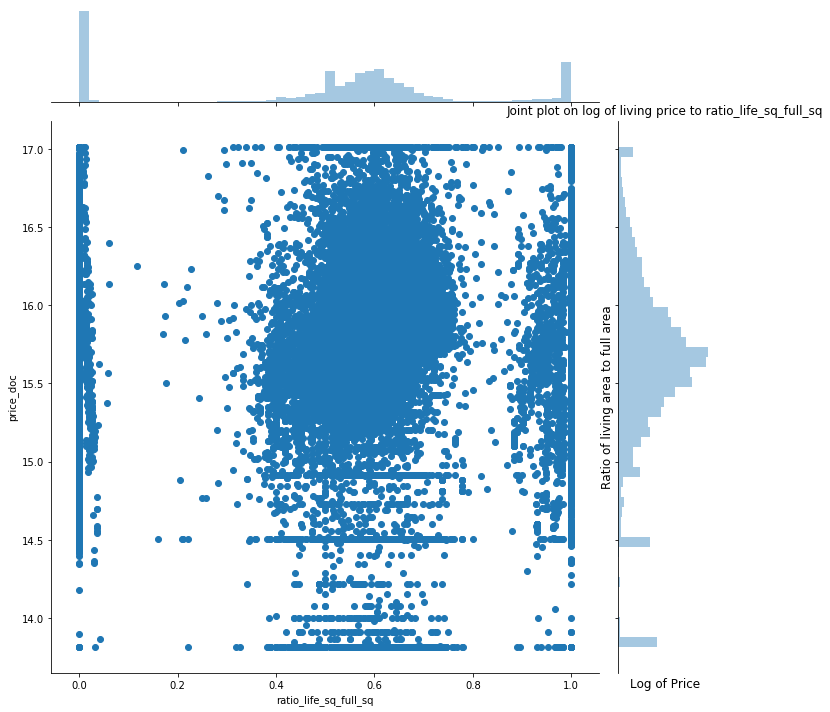

In [62]:
plt.figure(figsize = (12, 12))
sns.jointplot(x = train_df['ratio_life_sq_full_sq'], 
              y = np.log1p(train_df['price_doc']), size = 10)
plt.xlabel('Log of Price', fontsize = 12)
plt.ylabel('Ratio of living area to full area', fontsize = 12)
plt.title('Joint plot on log of living price to ratio_life_sq_full_sq')
plt.show()

C:\Users\zhang\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

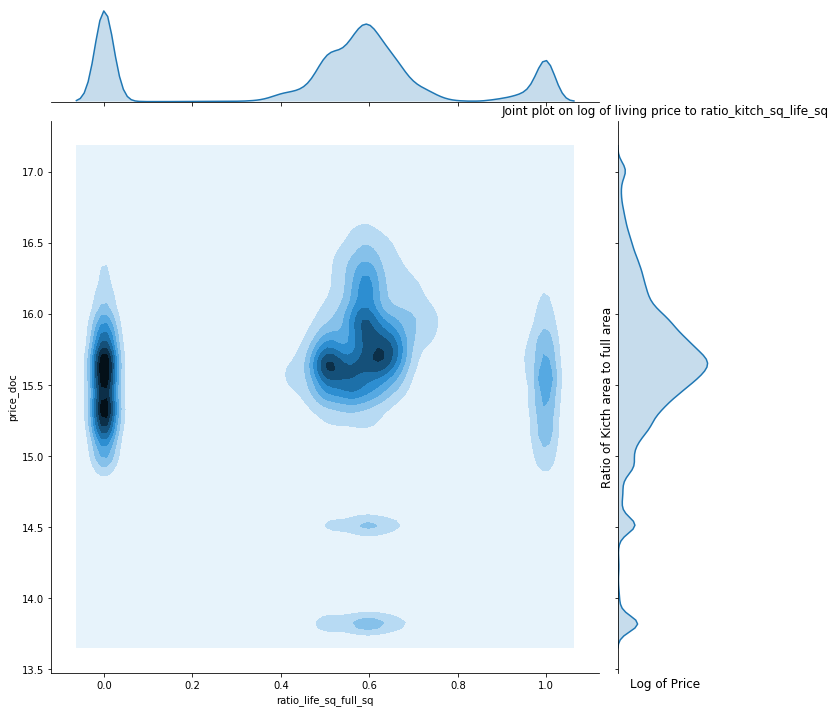

In [71]:
plt.figure(figsize = (12, 12))
sns.jointplot(x = train_df['ratio_life_sq_full_sq'], 
              y = np.log1p(train_df['price_doc']), kind = 'kde', size = 10)
plt.xlabel('Log of Price', fontsize = 12)
plt.ylabel('Ratio of Kicth area to full area', fontsize = 12)
plt.title('Joint plot on log of living price to ratio_kitch_sq_life_sq')
plt.show()

In [72]:
# floor of the house to the total number of floors in the house 
train_df["ratio_floor_max_floor"] = train_df["floor"] / train_df["max_floor"].astype("float")
test_df["ratio_floor_max_floor"] = test_df["floor"] / test_df["max_floor"].astype("float")

# num of floor from top
train_df["floor_from_top"] = train_df["max_floor"] - train_df["floor"]
test_df["floor_from_top"] = test_df["max_floor"] - test_df["floor"]

# difference between full area and living area
train_df["extra_sq"] = train_df["full_sq"] - train_df["life_sq"]
test_df["extra_sq"] = test_df["full_sq"] - test_df["life_sq"]

# age of the building
train_df["age_of_building"] = train_df["build_year"] - train_df["year"]
test_df["age_of_building"] = test_df["build_year"] - test_df["year"]

# effect of school
train_df["ratio_preschool"] = train_df["children_preschool"] / train_df["preschool_quota"].astype("float")
test_df["ratio_preschool"] = test_df["children_preschool"] / test_df["preschool_quota"].astype("float")

train_df["ratio_school"] = train_df["children_school"] / train_df["school_quota"].astype("float")
test_df["ratio_school"] = test_df["children_school"] / test_df["school_quota"].astype("float")

In [76]:
def count_by_dates(df, col):
    temp_df = df.groupby(col)["id"].aggregate("count").reset_index()
    temp_df.columns = [col, "count_" + col]
    df = pd.merge(df, temp_df, on=col, how="left")
    return df

train_df = count_by_dates(train_df, "yearmonth")
test_df = count_by_dates(test_df, "yearmonth")

train_df = count_by_dates(train_df, "yearweek")
test_df = count_by_dates(test_df, "yearweek")

In [77]:
train_X = train_df.drop(['id', 'timestamp', 'price_doc'], axis = 1)
train_y = np.log1p(train_df["price_doc"])

test_X = test_df.drop(["id", 'timestamp'], axis = 1)

In [85]:
val_time = 201407

dev_X = train_X[(train_X['yearmonth'] < val_time)]
dev_y = train_y[(train_X['yearmonth'] < val_time)]

val_X = train_X[(train_X['yearmonth'] >= val_time)]
val_y = train_y[(train_X['yearmonth'] >= val_time)]

In [81]:
print(dev_X.shape, dev_y.shape)
print(val_X.shape, dev_y.shape)

(20483, 408) (20483,)
(9988, 408) (20483,)


In [89]:
xgb_params = {
    'eta': 0.05,
    'max_depth':4,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective':'reg:linear',
    'eval_metric':'rmse', 
    'min_child_weight':1,
    'silent':1,
    'seed':0
}

num_rounds = 100

xgtrain = xgb.DMatrix(dev_X, dev_y, feature_names = dev_X.columns)
xgtest = xgb.DMatrix(val_X, val_y, feature_names = val_X.columns)
watchlist = [(xgtrain, 'train'), (xgtest, 'test')]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds = 50, 
                  verbose_eval = 5)

[08:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:14.32328	test-rmse:14.45241
[5]	train-rmse:11.08898	test-rmse:11.21248
[10]	train-rmse:8.58761	test-rmse:8.70518
[15]	train-rmse:6.65345	test-rmse:6.76373
[20]	train-rmse:5.15834	test-rmse:5.26582
[25]	train-rmse:4.00426	test-rmse:4.10703
[30]	train-rmse:3.11435	test-rmse:3.21226
[35]	train-rmse:2.42960	test-rmse:2.52235
[40]	train-rmse:1.90471	test-rmse:1.99054
[45]	train-rmse:1.50514	test-rmse:1.58512
[50]	train-rmse:1

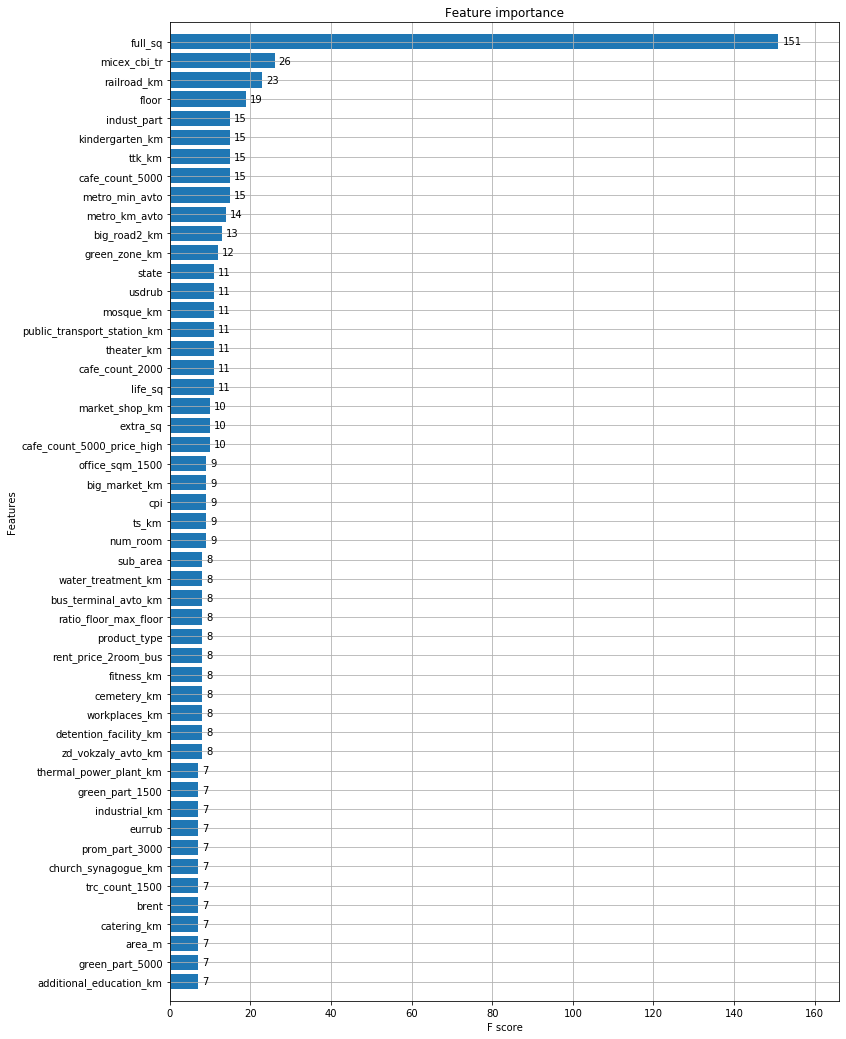

In [91]:
fig, ax = plt.subplots(figsize = (12,18))
xgb.plot_importance(model, max_num_features = 50, height = 0.8, ax = ax)
plt.show()